In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from sympy import *
from sympy.physics.quantum.dagger import Dagger

In [2]:
def trace(M):
    return M[0,0] + M[1,1] + M[2,2] + M[3,3]

In [3]:
t,p,ta,pa = symbols('theta phi theta_a phi_a', real=True)

In [40]:
G = Matrix([[cos(p/2)**2, I*cos(p/2)*sin(p/2), cos(p/2), 0],[-I*cos(p/2)*sin(p/2), sin(p/2)**2, -I*sin(p/2),0],
            [cos(p/2),I*sin(p/2),1,0],[0,0,0,0]])
AP = Matrix([[cos(ta/2),0,sin(ta/2),0],[0,cos(ta/2),0,sin(ta/2)],[sin(ta/2),0,-cos(ta/2),0],
              [0,sin(ta/2),0,-cos(ta/2)]])
AR = Matrix([[cos(pa/2),I*sin(pa/2),0,0],[I*sin(pa/2),cos(pa/2),0,0],[0,0,cos(pa/2),I*sin(pa/2)],
             [0,0,I*sin(pa/2),cos(pa/2)]])
AR_PS = Matrix([[cos(pa/2),I*sin(pa/2),0,0],[I*sin(pa/2),cos(pa/2),0,0],[0,0,1,0],
             [0,0,0,1]]) 
Gout = conjugate(AR)*conjugate(AP)*G*AP.T*AR.T

In [24]:
AP

Matrix([
[  cos(theta_a/2),              0, I*sin(theta_a/2),                0],
[               0, cos(theta_a/2),                0, I*sin(theta_a/2)],
[I*sin(theta_a/2),              0,   cos(theta_a/2),                0],
[               0, sin(theta_a/2),                0,   cos(theta_a/2)]])

In [47]:
G

Matrix([
[           cos(phi/2)**2, I*sin(phi/2)*cos(phi/2),    cos(phi/2), 0],
[-I*sin(phi/2)*cos(phi/2),           sin(phi/2)**2, -I*sin(phi/2), 0],
[              cos(phi/2),            I*sin(phi/2),             1, 0],
[                       0,                       0,             0, 0]])

In [48]:
C_ta_pa = trigsimp((Gout[0,0]-Gout[1,1]-Gout[2,2]+Gout[3,3])/(Gout[0,0]+Gout[1,1]+Gout[2,2]+Gout[3,3]))
C_ta_pa

sin(theta_a)*cos(phi/2 + phi_a) - cos(phi_a)*cos(theta_a)/2 + cos(theta_a)*cos(phi + phi_a)/2

In [49]:
Expected = sin(p/2)*sin(ta-pa-p/2) - (1-sin(p/2))*cos(pa+p/2)*sin(ta)
trigsimp(Expected-C_ta_pa)

sin(phi/2 + phi_a - theta_a) - sin(phi/2 + phi_a + theta_a) - cos(phi_a - theta_a)/2 + cos(phi_a + theta_a)/2 + cos(phi + phi_a - theta_a)/2 - cos(phi + phi_a + theta_a)/2

In [50]:
trigsimp(Expected)

-(1 - sin(phi/2))*sin(theta_a)*cos(phi/2 + phi_a) - sin(phi/2)*sin(phi/2 + phi_a - theta_a)

(0.0, 6.283185307179586, 0.0, 6.283185307179586)

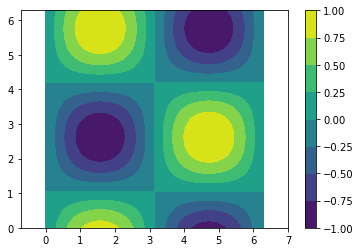

In [51]:
f = lambdify((t,p,ta,pa),trigsimp(C_ta_pa-Expected), "numpy")
ta_range = np.linspace(0,2*np.pi,1000)
pa_range = np.linspace(0,2*np.pi,1000)
phi_fixed = np.pi/3
X, Y = np.meshgrid(ta_range, pa_range)
def ftemp(ta_val,pa_val):
    return f(0,phi_fixed,ta_val,pa_val)
Z = ftemp(X,Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
ax.axis('equal')

In [12]:
G_input = Matrix([1,0,1,0])*Matrix([1,0,1,0]).T
a = conjugate(AR_PS)*G_input*AR_PS.T

In [39]:
a

Matrix([
[             cos(phi_a/2)**2, I*sin(phi_a/2)*cos(phi_a/2),    cos(phi_a/2), 0],
[-I*sin(phi_a/2)*cos(phi_a/2),             sin(phi_a/2)**2, -I*sin(phi_a/2), 0],
[                cos(phi_a/2),              I*sin(phi_a/2),               1, 0],
[                           0,                           0,               0, 0]])

In [14]:
AR_PS.T*conjugate(AR_PS)

Matrix([
[sin(phi_a/2)**2 + cos(phi_a/2)**2,                                 0, 0, 0],
[                                0, sin(phi_a/2)**2 + cos(phi_a/2)**2, 0, 0],
[                                0,                                 0, 1, 0],
[                                0,                                 0, 0, 1]])

In [15]:
trigsimp(trace(a*a) - 1)*1/3

(1 - cos(phi_a))**2/6 + cos(phi_a)/3 - cos(2*phi_a)/12 + 3/4

In [16]:
trace(G*G)

sin(phi/2)**4 + 2*sin(phi/2)**2*cos(phi/2)**2 - 2*sin(phi/2)**2 + cos(phi/2)**4 + 2*cos(phi/2)**2 + 1